In [1]:
!pip install contextily

In [2]:
!pip install geopandas contextily folium matplotlib seaborn scikit-learn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import geopandas as gpd
import contextily as ctx
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point

In [65]:
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum11/data/worldcities.csv')
df.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        44691 non-null  object 
 1   city_ascii  44691 non-null  object 
 2   lat         44691 non-null  float64
 3   lng         44691 non-null  float64
 4   country     44691 non-null  object 
 5   iso2        44658 non-null  object 
 6   iso3        44691 non-null  object 
 7   admin_name  44375 non-null  object 
 8   capital     11138 non-null  object 
 9   population  44384 non-null  float64
 10  id          44691 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 3.8+ MB


In [23]:
df.isnull().sum()

,0
city,0
city_ascii,0
lat,0
lng,0
country,0
iso2,33
iso3,0
admin_name,316
capital,33553
population,307


In [24]:
df.duplicated().sum()

np.int64(0)

In [26]:
df['population'] = df['population'].fillna(df['population'].mean())

In [27]:
df.isnull().sum()

,0
city,0
city_ascii,0
lat,0
lng,0
country,0
iso2,33
iso3,0
admin_name,316
capital,33553
population,0


In [28]:
coords = df[['lat', 'lng']].dropna().values.tolist()
len(coords)

44691

In [66]:
m = folium.Map(
    location=[df['lat'].mean(), df['lng'].mean()],
    zoom_start=11
)

HeatMap(coords, radius=8).add_to(m)
m

In [31]:
df['lat_j'] = df['lat'] + np.random.normal(0, 0.0005, len(df))
df['lon_j'] = df['lng'] + np.random.normal(0, 0.0005, len(df))

coords_jitter = df[['lat_j', 'lon_j']].values.tolist()

m2 = folium.Map(location=[df['lat_j'].mean(), df['lon_j'].mean()], zoom_start=11)
HeatMap(coords_jitter, radius=8).add_to(m2)
m2

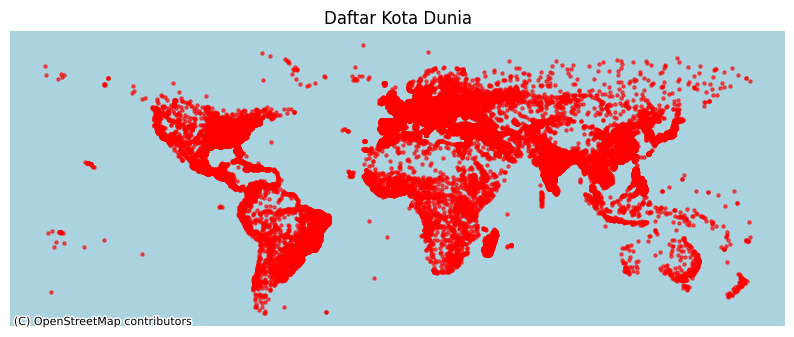

In [33]:
import geopandas
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['lng'], df['lat'])]
gdf = geopandas.GeoDataFrame(df, geometry=geometry)

fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(ax=ax, alpha=0.6, markersize=5, color='red')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

ax.set_axis_off()
plt.title("Daftar Kota Dunia")
plt.show()

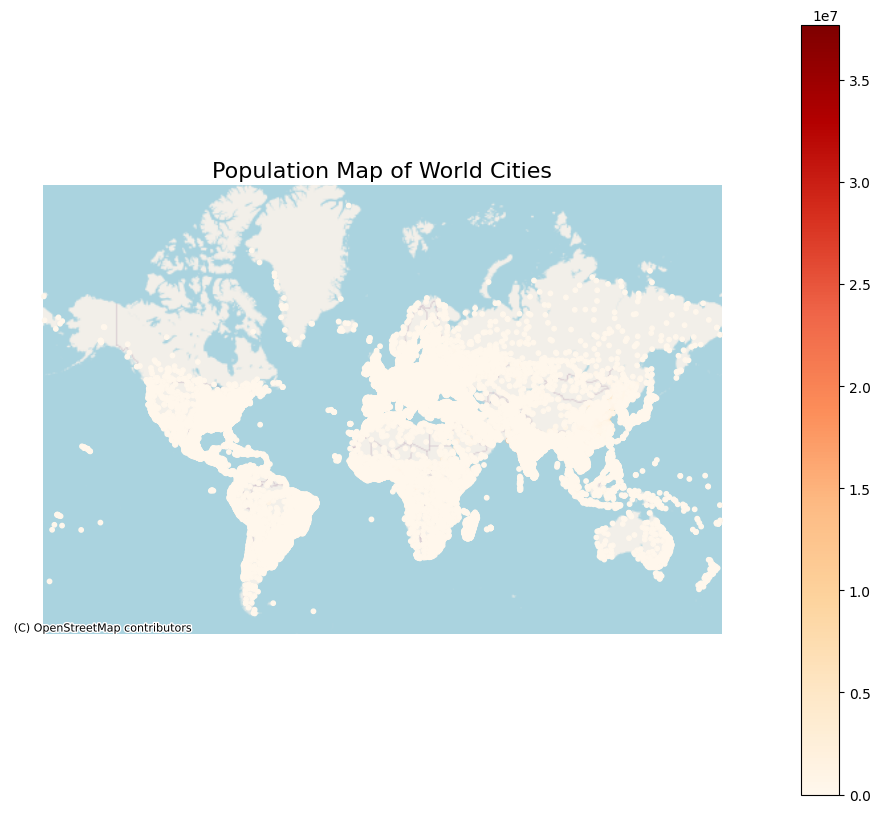

In [40]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

geometry = gpd.points_from_xy(df['lng'], df['lat'])

gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 10))

gdf.plot(
    ax=ax,
    column='population',
    cmap='OrRd',
    markersize=10,
    legend=True
)

# 6. Tambah basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Population Map of World Cities", fontsize=16)
ax.set_axis_off()

plt.show()

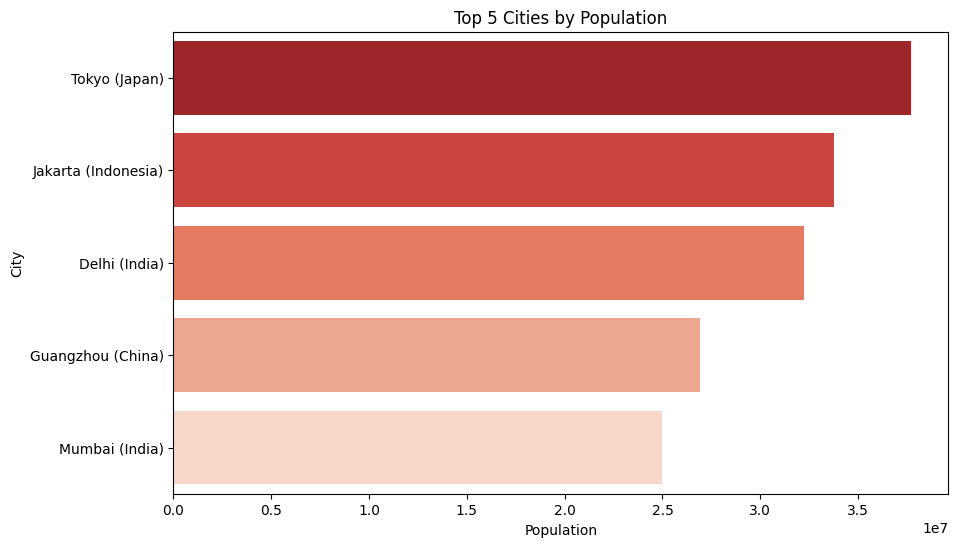

In [41]:
# Ambil 5 kota dengan populasi terbesar
top5_highest_population = df.sort_values('population', ascending=False).head(5)

# Membuat label unik berdasarkan nama kota + negara
top5_highest_population['display_label'] = (
    top5_highest_population['city'] + " (" + top5_highest_population['country'] + ")"
)

plt.figure(figsize=(10,6))

sns.barplot(
    data=top5_highest_population,
    x='population',
    y='display_label',
    hue='display_label',
    palette='Reds_r',
    legend=False
)

plt.title("Top 5 Cities by Population")
plt.xlabel("Population")
plt.ylabel("City")
plt.show()

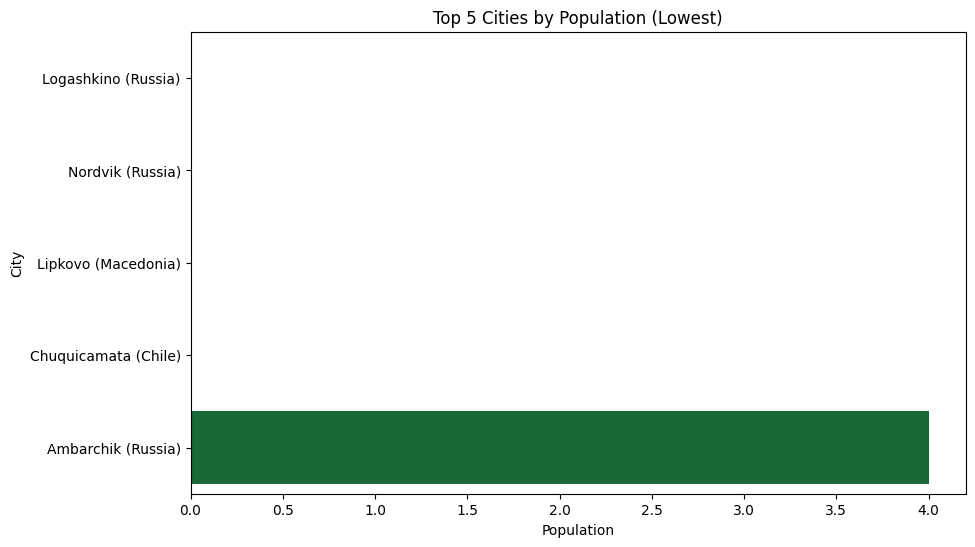

In [42]:
# Ambil 5 kota dengan populasi terendah
top5_lowest_population = df.sort_values('population', ascending=True).head(5)

# Membuat label unik berdasarkan nama kota + negara
top5_lowest_population['display_label'] = (
    top5_lowest_population['city'] + " (" + top5_lowest_population['country'] + ")"
)

plt.figure(figsize=(10,6))

sns.barplot(
    data=top5_lowest_population,
    x='population',
    y='display_label',
    hue='display_label',
    palette='Greens',
    legend=False
)

plt.title("Top 5 Cities by Population (Lowest)")
plt.xlabel("Population")
plt.ylabel("City")
plt.show()


In [43]:
from scipy.stats import shapiro

# Uji Normalitas Kolom Population
stat, p = shapiro(df['population'])

print(f"P-value Shapiro: {p}")

if p > 0.05:
    print("Data berdistribusi NORMAL")
else:
    print("Data TIDAK normal (gunakan korelasi Spearman)")

P-value Shapiro: nan
Data TIDAK normal (gunakan korelasi Spearman)


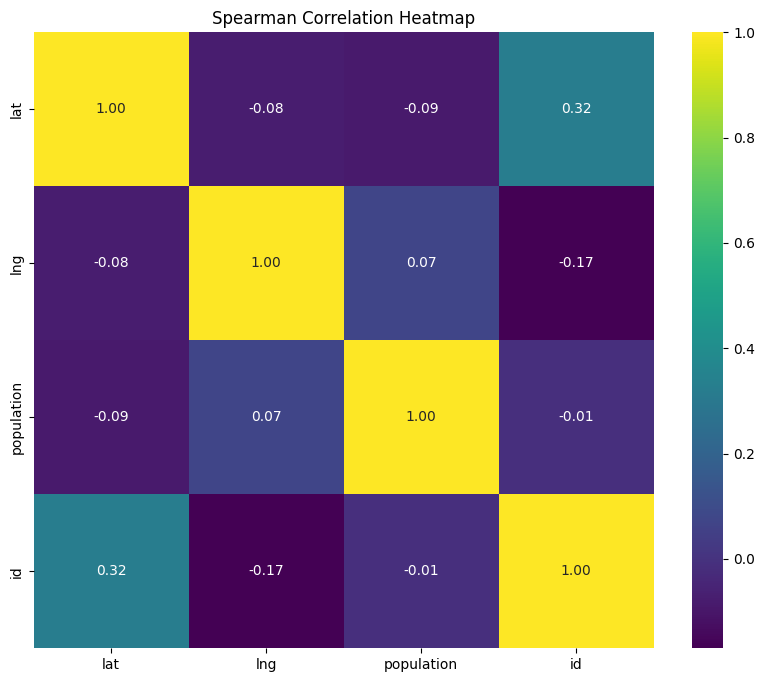

In [44]:
corr_df = df.select_dtypes(include=np.number)
spearman_corr = corr_df.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

In [45]:
from sklearn.preprocessing import RobustScaler

# Kolom numerik yang tersedia di dataset worldcities
cols_for_clustering = ['lat', 'lng', 'population']

# Ambil subset data
X = df[cols_for_clustering].copy()

# Scaling menggunakan RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=cols_for_clustering)

print("Data berhasil di-scaling untuk clustering!")

Data berhasil di-scaling untuk clustering!


In [47]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# ubah ke DataFrame biar rapi
X_scaled = pd.DataFrame(X_scaled, columns=cols_for_clustering)

X_scaled.head()

,lat,lng,population
0,0.110067,1.006106,1052.769721
1,-1.265555,0.744082,941.772604
2,-0.122563,0.508107,899.059930
3,-0.302629,0.795367,751.491831
4,-0.435835,0.473405,696.579524


In [53]:
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Pilih kolom numerik yang ingin digunakan
cols_for_clustering = ['lat', 'lng', 'population']

X = df[cols_for_clustering].copy()

# --- Perbaikan: Isi NaN dengan median ---
X = X.fillna(X.median())

# Scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=cols_for_clustering)

# Nearest Neighbors
min_samples = 10
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)

# Hitung jarak
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, -1])

# Print 20 jarak terbesar
print("20 Jarak Terbesar:")
print(distances[-20:])


20 Jarak Terbesar:
[ 52.7442568   53.32173888  54.52906109  55.04658333  56.27906421
  58.09193591  62.11707646  62.38854147  66.06468444  78.91588473
  92.82458957 124.11043462 126.10299411 153.99880791 178.00630366
 179.44814666 192.74079022 294.70998984 337.97585442 450.40587991]


In [52]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.30, min_samples=10)
labels = dbscan.fit_predict(X_scaled)

labels[:20]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

In [54]:
df['cluster'] = labels
df['cluster'].value_counts()

,count
cluster,
0,42278
-1,2042
6,61
4,50
7,34
15,32
18,29
3,24
16,17


In [55]:
from sklearn.metrics import silhouette_score

# silhouette hanya dihitung untuk cluster bukan -1
mask = df['cluster'] != -1
sil_score = silhouette_score(X_scaled[mask], df['cluster'][mask])

sil_score

np.float64(-0.030776926914591333)

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_results = pca.fit_transform(X_scaled)

df['pca1'] = pca_results[:, 0]
df['pca2'] = pca_results[:, 1]

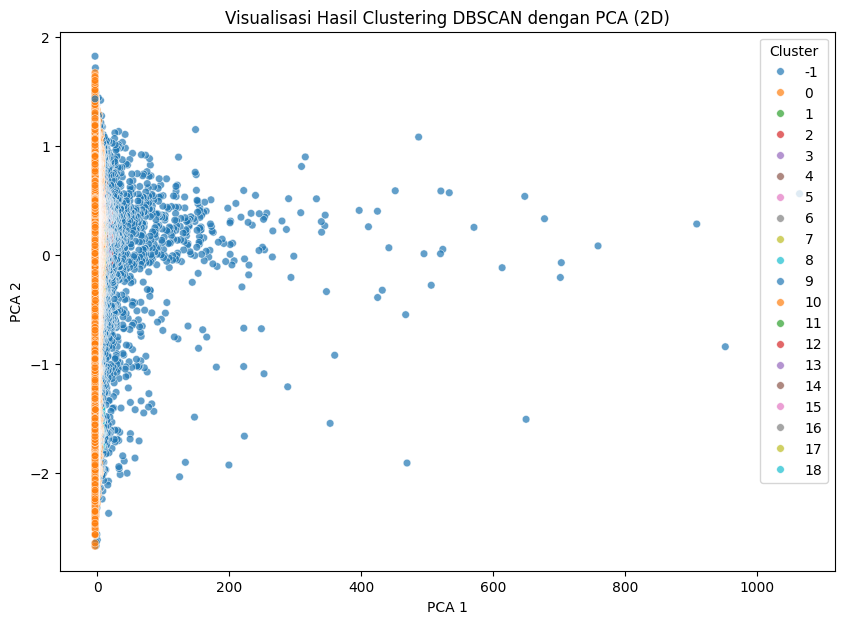

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='pca1',
    y='pca2',
    hue='cluster',
    palette='tab10',
    s=30,
    alpha=0.7
)

plt.title("Visualisasi Hasil Clustering DBSCAN dengan PCA (2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()

In [59]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['lng'], df['lat']),
    crs='EPSG:4326'
)

In [60]:
gdf = gdf.to_crs(epsg=3857)

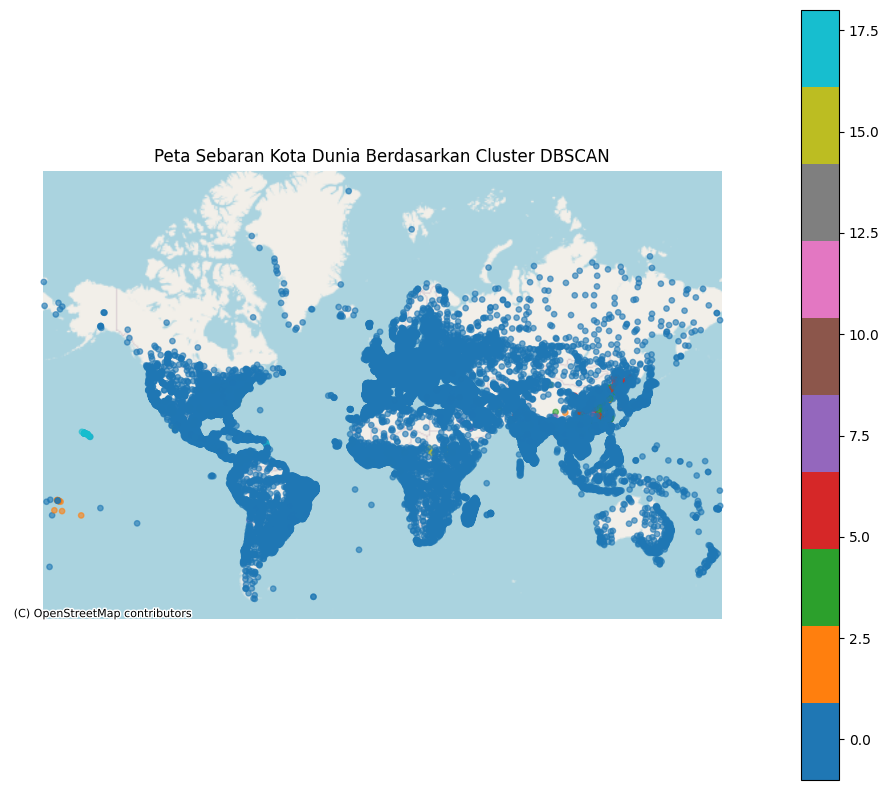

In [63]:
import geopandas as gpd

# Konversi ke GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['lng'], df['lat']),
    crs='EPSG:4326' # Koordinat GPS standar
)

# Ubah ke Web Mercator (Biar pas sama peta background)
gdf = gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Plot Cluster
gdf.plot(
    ax=ax,
    column='cluster',
    cmap='tab10',
    markersize=15,
    legend=True,
    alpha=0.6
)

# Tambah Basemap (Peta Jalanan)
try:
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
except:
    print("Gagal memuat basemap. Menampilkan titik tanpa peta latar.")

ax.set_title("Peta Sebaran Kota Dunia Berdasarkan Cluster DBSCAN")
ax.set_axis_off()
plt.show()